# FINAL PROJECT
____

## Import Package

In [33]:
import itertools
import joblib
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import chi2_contingency

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 1000)

## Load Data

Mengimport data dan melihat contoh isi data

In [4]:
data = pd.read_csv("loan_data_2007_2014.csv")

C:\Users\ACER\AppData\Local\Temp\ipykernel_19308\2557632514.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("loan_data_2007_2014.csv")


- Tampilan Data

In [5]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and f

## Deskripsi Data

Melihat informasi yang ada pada data, dan deskripsi masing-masing kolom pada data

- Informasi Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

- Deskripsi tiap kolom

In [7]:
desc_data = pd.read_excel('LCDataDictionary.xlsx',sheet_name='LoanStats')

In [8]:
desc_data[['Features','Description']]

,Features,Description
0,_rec,The total amount committed by investors for that loan at that point in time.
1,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,collection_recovery_fee,post charge off collection fee
8,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
9,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


## EDA & Feature Selection

In [9]:
title_font = dict(size=20, weight="bold")

def plot_count(df, y, title, **sns_kwargs):
    value_counts = df[y].value_counts()
    percentage = value_counts / value_counts.sum()
    percentage = percentage.apply("{:.2%}".format)

    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.countplot(data=df, y=y, order=value_counts.index, **sns_kwargs)
    plt.ylabel("")
    plt.show()

    print(percentage)


def plot_distribution(df, x, title, **sns_kwargs):
    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.histplot(data=df, x=x, kde=True, **sns_kwargs)
    plt.ylabel("")
    plt.show()


def plot_boxplot(df, x, y, title, **sns_kwargs):
    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.boxplot(data=df, x=x, y=y, **sns_kwargs)
    plt.ylabel("")
    plt.show()

### Status Pinjaman (`Y`)
Tujuan analisis kali ini adalah memprediksi kelayakan seseorang menerima pinjaman. Hal tersebut dapat dilihat dari berhasil atau tidaknya seseorang membayar tagihan pinjaman. Hal tersebut dapat dilihat dari variabel `loan_status` pada data.

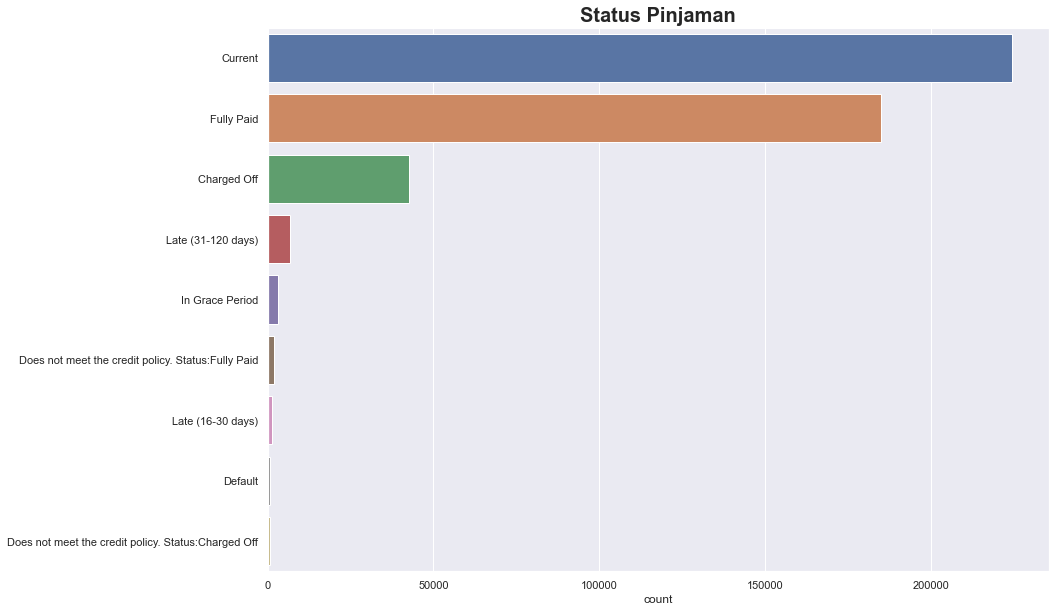

Current                                                48.09%
Fully Paid                                             39.62%
Charged Off                                             9.11%
Late (31-120 days)                                      1.48%
In Grace Period                                         0.67%
Does not meet the credit policy. Status:Fully Paid      0.43%
Late (16-30 days)                                       0.26%
Default                                                 0.18%
Does not meet the credit policy. Status:Charged Off     0.16%
Name: loan_status, dtype: object


In [10]:
plot_count(data, title="Status Pinjaman",  y="loan_status")

Sebagian besar pinjaman berada dalam status "sedang berjalan". Pada tingkat keberhasilan, pinjaman yang berhasil dibayarkan kembali memiliki rasio yang lebih tinggi ketimbang pinjaman yang terlambat.

#### Menentukan Kategori Status Pinjaman 
Untuk menyederhanakan kategori dari variabel Y nantinya, `loan_status` dikelompokkan menjadi berhasil bayar yang akan menjadi 'Disetujui', dan gagal bayar yang akan menjadi 'Ditolak' pada variabel `Y` nantinya. Oleh karena itu kita hanya akan mengambil 2 kategori yaitu:
- Disetujui, terdiri dari: Fully Paid
- Ditolak, terdiri dari: Charged Off, Default, dan Does not meet the credit policy

Kita tidak bisa menggunakan `current` karena pinjaman tersebut masih berlangsung, begitu pula dengan `late` dan `in_grace_period`.

In [11]:
# Tentukan kategori yang akan digunakan
approved_cat = ["Fully Paid"]
dissaproved_cat = [
    "Charged Off",
    "Default",
    "Does not meet the credit policy. Status:Fully Paid",
    "Does not meet the credit policy. Status:Charged Off"
]

In [12]:
# Ganti dengan label baru
def label_loan_status(value):
    if value in approved_cat:
        return 1
    return 0

label_loan_status("Fully Paid")

1

In [13]:
# Saring dan terapkan fungsi
y_fix_df = data[data["loan_status"].isin(approved_cat + dissaproved_cat)].copy()
y_fix_df["loan_status"] = y_fix_df["loan_status"].apply(label_loan_status)

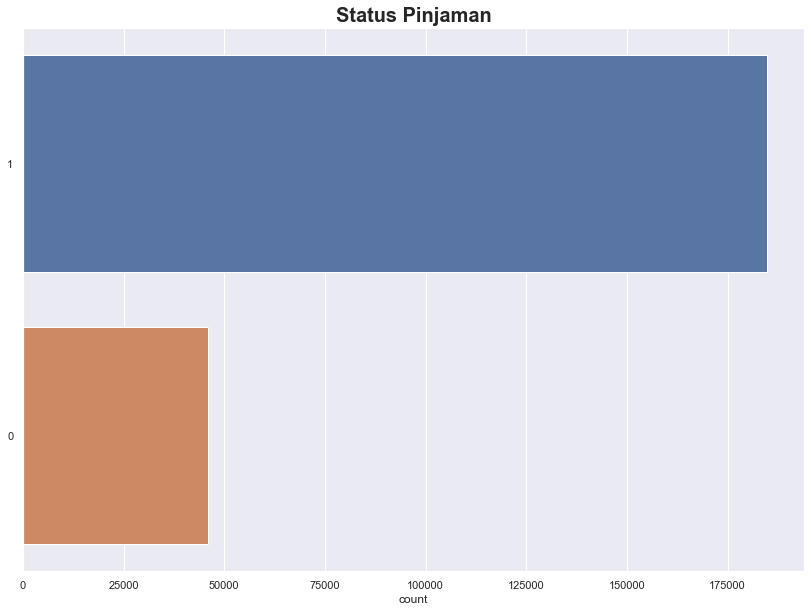

1    80.04%
0    19.96%
Name: loan_status, dtype: object


In [14]:
plot_count(y_fix_df, y="loan_status", title="Status Pinjaman")

### Menganalisis Variabel `X`

Menganalisis variabel `X` berdasarkan korelasi dengan variabel `Y` (`loan_status`), Khusus variabel bertipe date tidak akan digunakan karena prediksi kali ini tidak berdasarkan deret waktu. Tiap pengamatan juga tidak memiliki range waktu yang sama.

In [15]:
# Menghapus Variabel bertipe date
date_cols = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d", "next_pymnt_d"]
y_fix_df = y_fix_df.drop(columns=date_cols,errors="ignore")
y_fix_df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,1,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.000,171.62,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,0,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.110,119.66,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,1,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.000,649.91,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,1,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.000,357.48,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,1,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075269,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.000,161.03,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

- Menghitung korelasi X dan Y

In [16]:
correlations = (y_fix_df.select_dtypes(exclude=object)
                         .corr()
                         .dropna(how="all", axis=0)
                         .dropna(how="all", axis=1)
)

In [17]:
correlations["loan_status"].abs().sort_values(ascending=False)

loan_status                    1.000000
total_rec_prncp                0.460338
recoveries                     0.445422
last_pymnt_amnt                0.384781
total_pymnt_inv                0.358588
total_pymnt                    0.355349
collection_recovery_fee        0.300094
int_rate                       0.241059
total_rec_late_fee             0.152231
inq_last_6mths                 0.116393
dti                            0.107257
out_prncp                      0.099816
out_prncp_inv                  0.099814
revol_util                     0.089180
tot_cur_bal                    0.076230
mths_since_last_record         0.062190
annual_inc                     0.061623
total_rev_hi_lim               0.052931
loan_amnt                      0.049253
funded_amnt                    0.048790
funded_amnt_inv                0.039854
installment                    0.033419
total_rec_int                  0.032997
total_acc                      0.030680
mths_since_last_delinq         0.029299


In [18]:
# Saring korelasi antara vmin - vmax
vmin, vmax = 0.1, 0.99

unstack_corr = correlations.unstack()
pos_corr = (unstack_corr > vmin) & (unstack_corr < vmax)
neg_corr = (unstack_corr > -vmax) & (unstack_corr < -vmin)
high_corr = unstack_corr[pos_corr | neg_corr]

trimmed_corr = high_corr.sort_values(ascending=False).unstack()

In [19]:
affect_loan = high_corr.loc["loan_status"].sort_values(ascending=False)
affect_loan

total_rec_prncp            0.460338
last_pymnt_amnt            0.384781
total_pymnt_inv            0.358588
total_pymnt                0.355349
dti                       -0.107257
inq_last_6mths            -0.116393
total_rec_late_fee        -0.152231
int_rate                  -0.241059
collection_recovery_fee   -0.300094
recoveries                -0.445422
dtype: float64

Didapatkan sebanyak 10 variabel `X` yang cukup berkorelasi dengan `loan_status`

In [61]:
# Mencegah variabel kategori yang memiliki korelasi tinggi untuk dilibatkan
threshold = 0.5
affect_collision = (high_corr.abs()
                             .loc[high_corr > threshold]
                             .loc[affect_loan.index, affect_loan.index]
                             .sort_values(ascending=False)
)
affect_collision

C:\Users\ACER\AppData\Local\Temp\ipykernel_19308\1963815090.py:3: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  affect_collision = (high_corr.abs()


total_rec_prncp          total_pymnt                0.975030
total_pymnt              total_rec_prncp            0.975030
total_rec_prncp          total_pymnt_inv            0.969473
total_pymnt_inv          total_rec_prncp            0.969473
collection_recovery_fee  recoveries                 0.798358
recoveries               collection_recovery_fee    0.798358
total_rec_prncp          last_pymnt_amnt            0.744957
last_pymnt_amnt          total_rec_prncp            0.744957
                         total_pymnt_inv            0.691699
total_pymnt_inv          last_pymnt_amnt            0.691699
last_pymnt_amnt          total_pymnt                0.688667
total_pymnt              last_pymnt_amnt            0.688667
dtype: float64

In [63]:
correlated_variables = list(set(affect_collision.index.get_level_values(0)))
correlated_variables

['last_pymnt_amnt',
 'total_rec_prncp',
 'recoveries',
 'total_pymnt',
 'collection_recovery_fee',
 'total_pymnt_inv']

In [66]:
# Memilih hanya salah satu dari tiap salah satu dari fitur yang saling berhubungan berdasarkan korelasi yang paling besar
affect_loan[correlated_variables].sort_values(ascending=False)

total_rec_prncp            0.460338
last_pymnt_amnt            0.384781
total_pymnt_inv            0.358588
total_pymnt                0.355349
collection_recovery_fee   -0.300094
recoveries                -0.445422
dtype: float64

Berdasarkan korelasi-korelasi tersebut dari 6 fitur dipilih 2 fitur yang dianggap mewakili fitur lainnya yang berhubungan karena memiliki korelasi yang lebih besar/kuat terhadap `loan_status`, yakni ['total_rec_prncp','recoveries'] 

In [144]:
correlated_num_features = ['last_pymnt_amnt','total_pymnt_inv','total_pymnt','collection_recovery_fee']
num_features = [feature for feature in affect_loan.index if feature not in correlated_num_features]
num_features

['total_rec_prncp',
 'dti',
 'inq_last_6mths',
 'total_rec_late_fee',
 'int_rate',
 'recoveries']

- Variabel `X` kategorik

In [145]:
# Kolom-kolom yang berdata kategorik
cat_features = y_fix_df.select_dtypes(include=object).columns
cat_features

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status',
       'application_type'],
      dtype='object')

Beberapa kolom kategorikal yang tidak terpakai adalah:
- desc dan title karena merupakan teks.
- zip_code karena 3 angka dibelakangnya disensor
- sub_grade karena sudah memiliki kolom yang mirip yaitu grade

In [146]:
unused_cols = ["desc", "zip_code", "sub_grade", "title"]
cat_features = [col for col in cat_features if col not in unused_cols]

In [24]:
# preview unique value data kategorik
y_fix_df[cat_features].nunique()

term                        2
grade                       7
emp_title              126879
emp_length                 11
home_ownership              6
verification_status         3
pymnt_plan                  2
url                    230795
purpose                    14
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

kolom dengan unique value yang sangat banyak (`emp_title` & `url`) dan yang hanya memiliki 1 unique value (`application_type`) dihapus karena kurang merepresentasikan sebuah kelompok kategori calon peminjam 

In [147]:
cat_features = [col for col in cat_features if col not in ['emp_title','url','application_type']]
cat_features

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status']

In [44]:
# Melihat preview data variabel prediktor kategorik yang akan digunakan 
y_fix_df[cat_features]

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status
0,36 months,B,10+ years,RENT,Verified,n,credit_card,AZ,f
1,60 months,C,< 1 year,RENT,Source Verified,n,car,GA,f
2,36 months,C,10+ years,RENT,Not Verified,n,small_business,IL,f
3,36 months,C,10+ years,RENT,Source Verified,n,other,CA,f
5,36 months,A,3 years,RENT,Source Verified,n,wedding,AZ,f
...,...,...,...,...,...,...,...,...,...
466276,60 months,D,5 years,MORTGAGE,Verified,n,medical,MA,f
466277,36 months,A,3 years,RENT,Verified,n,debt_consolidation,MD,f
466278,36 months,D,10+ years,RENT,Source Verified,n,vacation,VA,f
466281,60 months,D,10+ years,MORTGAGE,Verified,n,debt_consolidation,TN,f


In [45]:
# membuat dictionary tabel kontingensi pada tiap pasang variabel untuk uji chisquare
contingency_dict = {}
for col in cat_features:
    contingency_dict[col] = pd.crosstab(y_fix_df[col],y_fix_df['loan_status'])

print(contingency_dict["term"])
print(contingency_dict["grade"])

loan_status      0       1
term                      
 36 months   30383  151101
 60 months   15673   33638
loan_status      0      1
grade                    
A             2655  36455
B             9660  60962
C            12808  45818
D            10651  26089
E             6376  10569
F             2969   3927
G              937    919


In [55]:
# Membuat dictionar dari p_value hasil chisquare test dari setiap variabel kategorik dengan loan_status
p_value_dict = {}
for col in contingency_dict:
    p_value_dict[col] = chi2_contingency(contingency_dict[col])[1]

H0 : variabel kategorik (X) berpengaruh pada variabel `loan_status` (Y)
H1 : variabel kategorik (X) tidak berpengaruh pada variabel `loan_status` (Y)

Kriteria pengujian, jika **`p-value` < 0.05** maka **H0 ditolak**

In [56]:
for col in p_value_dict:
    print(f"p_value chisquare test antara {col} dan loan_status = {p_value_dict[col]}")

p_value chisquare test antara term dan loan_status = 0.0
p_value chisquare test antara grade dan loan_status = 0.0
p_value chisquare test antara emp_length dan loan_status = 9.645270641733527e-11
p_value chisquare test antara home_ownership dan loan_status = 2.5740037477136043e-128
p_value chisquare test antara verification_status dan loan_status = 2.7218364763370874e-186
p_value chisquare test antara pymnt_plan dan loan_status = 1.0
p_value chisquare test antara purpose dan loan_status = 3.6666678681447386e-236
p_value chisquare test antara addr_state dan loan_status = 1.1427113921751333e-97
p_value chisquare test antara initial_list_status dan loan_status = 0.8868286389543449


Fitur kategorikal yang **TIDAK** akan digunakan adalah `pymnt_plant` dan `initial_list_status` karena memiliki p_value yang > 0.05 yang mana gagal menolak H0

In [148]:
cat_features = [feature for feature in cat_features if feature not in ["pymnt_plan","initial_list_status"]]
cat_features

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state']

In [91]:
# Mengidentifikasi fitur kategorik yang saling mempengaruhi
contingency_dict = {}
for col in cat_features:
    for other in [i for i in cat_features if i != col]:
        if (f"{col}-{other}" in contingency_dict.keys()) or (f"{other}-{col}" in contingency_dict.keys()):
            continue 
        contingency_dict[f"{col}-{other}"] = pd.crosstab(y_fix_df[col],y_fix_df[other])
        
# Membuat dictionary dari p_value hasil chisquare test dari setiap variabel kategorik dengan loan_status
p_value_dict = {}
for col in contingency_dict:
    p_value_dict[col] = chi2_contingency(contingency_dict[col])[1]

In [92]:
for col in p_value_dict:
    if p_value_dict[col]<0.05:
        print(f"p_value chisquare test antara {col} = {p_value_dict[col]}")

p_value chisquare test antara term-grade = 0.0
p_value chisquare test antara term-emp_length = 5.180568261206736e-282
p_value chisquare test antara term-home_ownership = 0.0
p_value chisquare test antara term-verification_status = 0.0
p_value chisquare test antara term-purpose = 0.0
p_value chisquare test antara term-addr_state = 1.7480846692285585e-82
p_value chisquare test antara grade-emp_length = 1.756570996507784e-16
p_value chisquare test antara grade-home_ownership = 0.0
p_value chisquare test antara grade-verification_status = 0.0
p_value chisquare test antara grade-purpose = 0.0
p_value chisquare test antara grade-addr_state = 1.310835121062917e-50
p_value chisquare test antara emp_length-home_ownership = 0.0
p_value chisquare test antara emp_length-verification_status = 0.0
p_value chisquare test antara emp_length-purpose = 0.0
p_value chisquare test antara emp_length-addr_state = 2.0112594632333737e-141
p_value chisquare test antara home_ownership-verification_status = 0.0
p

Karena keseluruhan variabel `X` kategorik saling berkaitan, maka dipilih 2 variabel yang memiliki pengaruh paling besar pada `loan_satus` yani `term` dan `grade`

In [149]:
cat_features = ['term','grade']

### Visualisasi

In [96]:
y_fix_df[num_features]

,total_rec_prncp,dti,inq_last_6mths,total_rec_late_fee,int_rate,recoveries
0,5000.00,27.65,1.0,0.00,10.65,0.00
1,456.46,1.00,5.0,0.00,15.27,117.08
2,2400.00,8.72,2.0,0.00,15.96,0.00
3,10000.00,20.00,1.0,16.97,13.49,0.00
5,5000.00,11.20,3.0,0.00,7.90,0.00
...,...,...,...,...,...,...
466276,360.08,12.28,0.0,0.00,18.25,1159.40
466277,4580.89,10.33,0.0,0.00,7.90,0.00
466278,10000.00,11.57,0.0,0.00,18.25,0.00
466281,1837.04,18.45,5.0,0.00,19.97,0.00


#### Status Pinjaman dan Besar Pinjaman Pokok yang Sudah Dibayarkan
Principal adalah besar pinjaman pokok yang dipinjamkan kepada debitur. Dengan kata lain merupakan jumlah asli dari uang yang dipinjamkan. Orang yang mengalami gagal bayar kebanyakan belum dapat membayarkan uang pokok pembayaran hingga jatuh tempo, bisa dilihat dari distribusi pembayaran dibawah. 


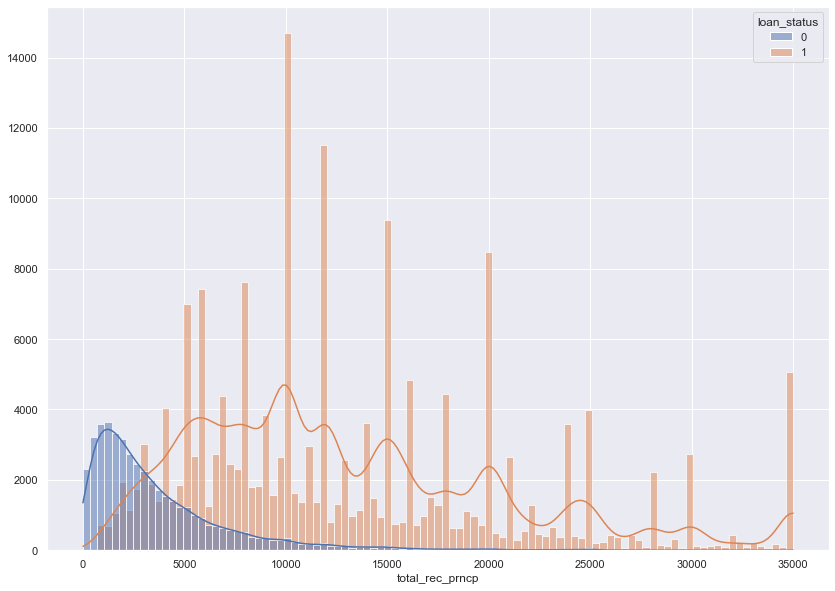

In [94]:
plot_distribution(df=y_fix_df, x="total_rec_prncp", hue="loan_status", title="")

Orang yang mengalami gagal bayar cenderung sudah membayar dengan jumlah yang sedikit.

#### Status Pinjaman dan Total Uang yang Tidak Ditagihkan
Charged off recoveries adalah total uang yang tidak bisa dibayarkan kepada perusahaan peminjam karena sudah lewat masa jatuh tempo sehingga perusahaan peminjam bisa melepas hak tagih utang tersebut dengan menjualnya ke perusahaan lain.


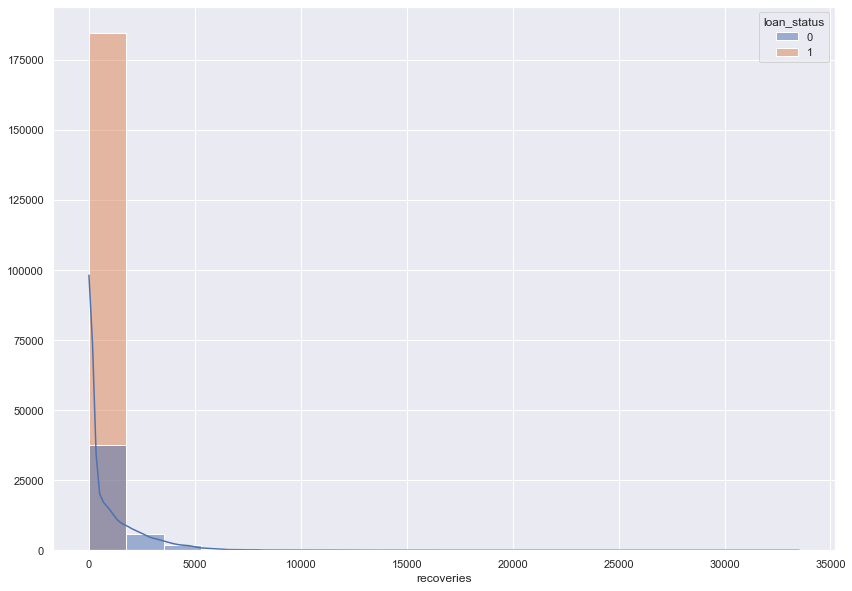

In [95]:
plot_distribution(df=y_fix_df, x="recoveries", hue="loan_status", title="")

Terlihat bahwa orang yang gagal bayar memiliki recovery yang lebih dari 0, sebaliknya orang yang berhasil bayar tidak memiliki recovery/recovery = 0

#### Status Pinjaman dan DTI (Debt to Income Ratio)
Debt to Income Ratio adalah rasio utang seseorang terhadap pendapatan kotornya saat ini.

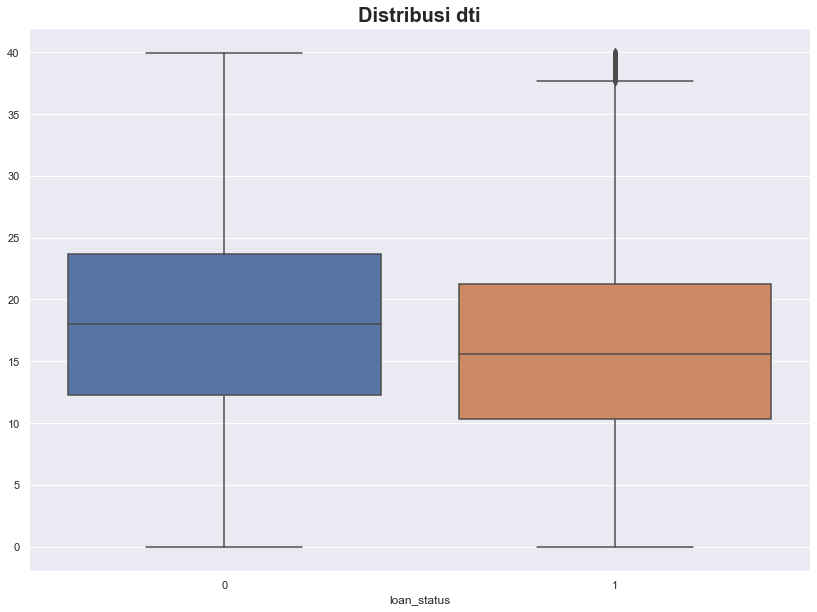

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,46056.0,17.997057,7.858143,0.0,12.25,18.00,23.65,39.98
1,184739.0,15.937997,7.569901,0.0,10.31,15.58,21.25,39.99


In [98]:
x, y = "loan_status", "dti"
plot_boxplot(df=y_fix_df, x=x, y=y, title="Distribusi dti")
y_fix_df.groupby(x)[y].describe()

Orang yang memiliki dti tidak terlalu tinggi cenderung berhasil untuk bayar, namun tidak menutup kemungkinan orang dengan dti tinggi berhasil bayar

#### Status Pinjaman dan Jumlah penyidikan 6 Bulan terakhir

Jumlah penyelidikan dalam 6 bulan terakhir (tidak termasuk penyelidikan mobil dan pegadaian)

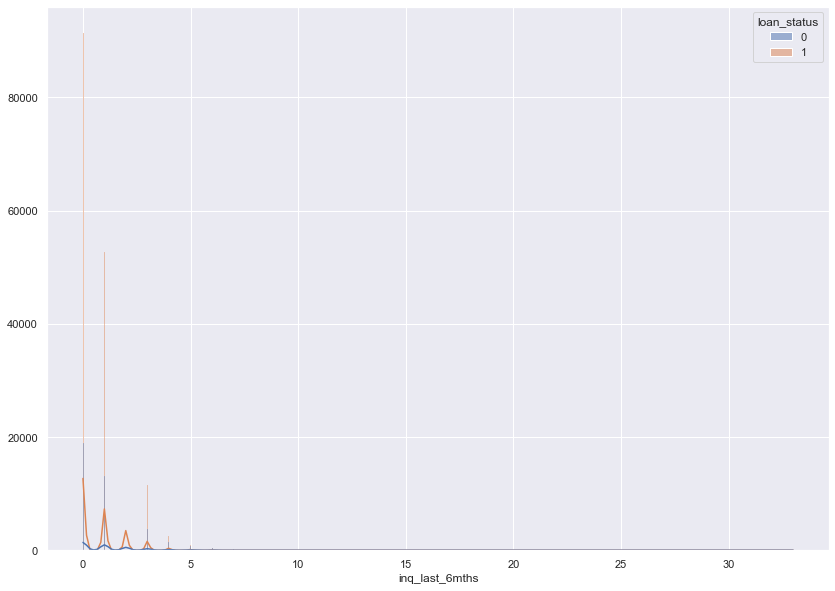

In [102]:
plot_distribution(df=y_fix_df, x="inq_last_6mths", hue="loan_status", title="")

Semakin sedikit jumlah penyelidikan 6 bulan terakhir, semakin besar peluang orang tersebut berhasil bayar

#### Status Pinjaman dan Besar biaya keterlambatan yang sudah dibayarkan
Biaya keterlambatan yang diterima hingga saat ini


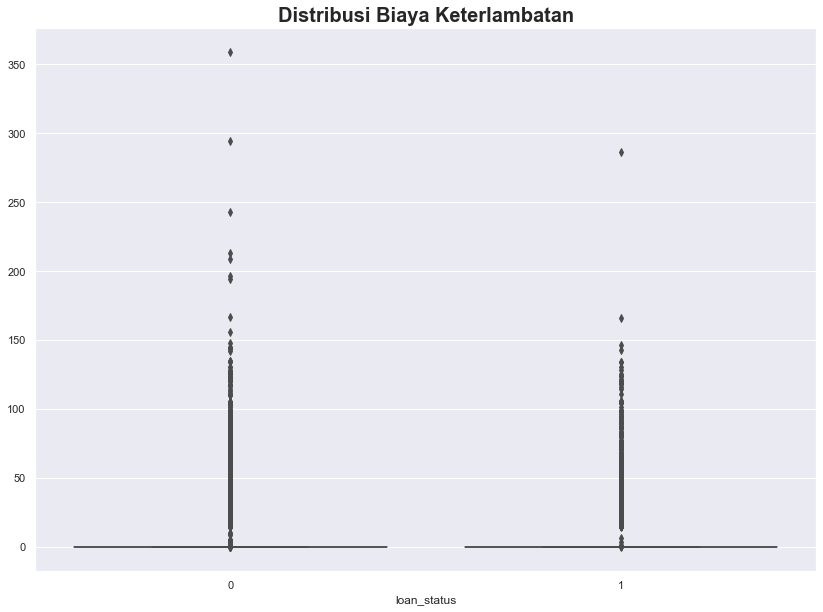

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,46056.0,2.573979,10.409126,0.0,0.0,0.0,0.0,358.680000
1,184739.0,0.365995,3.741159,0.0,0.0,0.0,0.0,286.747566


In [105]:
x, y = "loan_status", "total_rec_late_fee"
plot_boxplot(df=y_fix_df, x=x, y=y, title="Distribusi Biaya Keterlambatan")
y_fix_df.groupby(x)[y].describe()

Orang yang berhasil bayar memiliki biaya keterlambatan yang dibayarkan yang cenderung lebih kecil

#### Status Pinjaman dan Tingkat Bunga

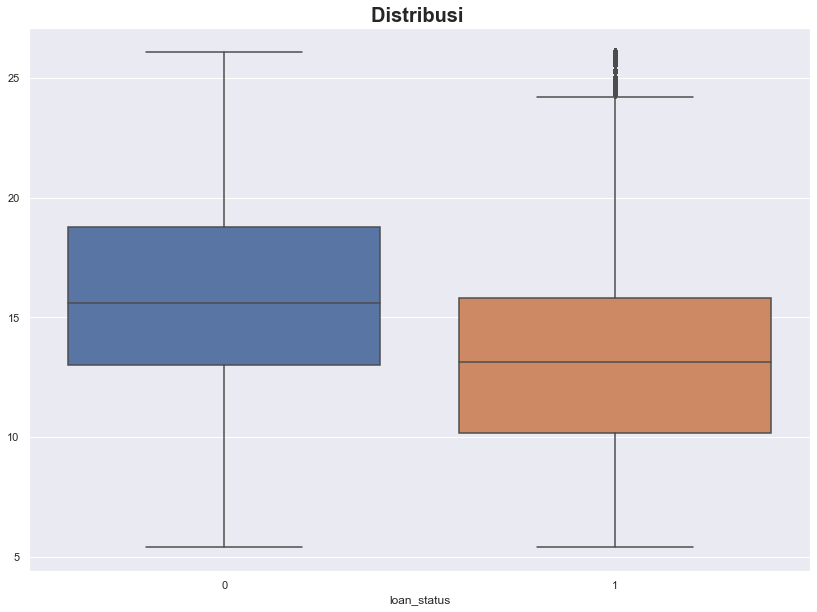

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,46056.0,15.890957,4.231485,5.42,12.99,15.61,18.75,26.06
1,184739.0,13.255943,4.242014,5.42,10.16,13.11,15.80,26.06


In [107]:
x, y = "loan_status", "int_rate"
plot_boxplot(df=y_fix_df, x=x, y=y, title="Distribusi ")
y_fix_df.groupby(x)[y].describe()

Orang yang berhasil bayar rata-rata mengambil utang dengan tingkat bunga yang lebih rendah

In [108]:
y_fix_df[cat_features]

,term,grade
0,36 months,B
1,60 months,C
2,36 months,C
3,36 months,C
5,36 months,A
...,...,...
466276,60 months,D
466277,36 months,A
466278,36 months,D
466281,60 months,D


#### Status Pinjaman dan Grade
Semakin tinggi Grade (Semakin mendekati grade G) maka bunga pinjaman (int_rate) akan semakin besar

In [121]:
data_freq = y_fix_df.groupby(['grade','loan_status']).count()['id']
data_freq = data_freq.reset_index()
data_freq

,grade,loan_status,id
0,A,0,2655
1,A,1,36455
2,B,0,9660
3,B,1,60962
4,C,0,12808
5,C,1,45818
6,D,0,10651
7,D,1,26089
8,E,0,6376
9,E,1,10569


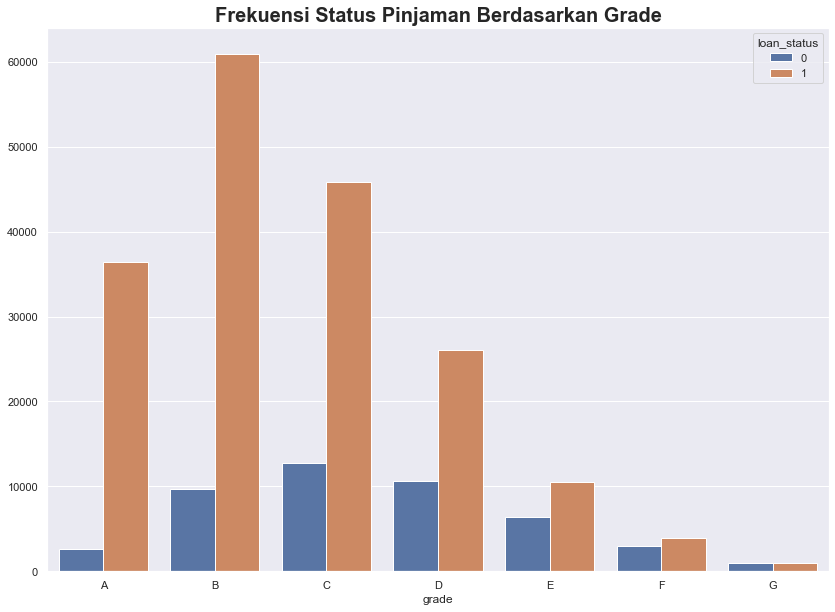

In [122]:
plt.figure(figsize=(14, 10))
plt.title("Frekuensi Status Pinjaman Berdasarkan Grade", fontdict=title_font)
sns.barplot(data=data_freq, x='grade',y='id',hue='loan_status')
plt.ylabel("")
plt.show()

grade sebenarnya tidak terlalu berdampak pada berhasil atau tidak nya seseorang dalam melakukan pembayaran

#### Status Pinjaman dan Term
Waktu pembayaran yang akan ditempuh (36/60 bulan)

In [123]:
data_freq_term = y_fix_df.groupby(['term','loan_status']).count()['id']
data_freq_term = data_freq_term.reset_index()
data_freq_term

,term,loan_status,id
0,36 months,0,30383
1,36 months,1,151101
2,60 months,0,15673
3,60 months,1,33638


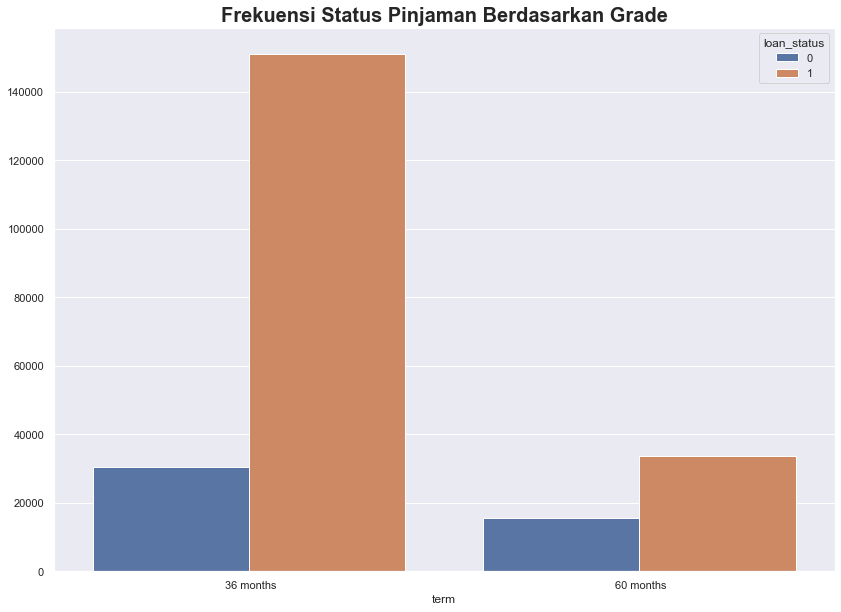

In [124]:
plt.figure(figsize=(14, 10))
plt.title("Frekuensi Status Pinjaman Berdasarkan Grade", fontdict=title_font)
sns.barplot(data=data_freq_term, x='term',y='id',hue='loan_status')
plt.ylabel("")
plt.show()

Term juga sebenarnya tidak terlalu berdampak pada berhasil atau tidaknya seseorang dalam melakukan pembayaran 

## Data Preparation

In [150]:
# Menggunakan fitur yang telah dipilih
pre_df = y_fix_df[num_features+cat_features+['loan_status']]
pre_df

,total_rec_prncp,dti,inq_last_6mths,total_rec_late_fee,int_rate,recoveries,term,grade,loan_status
0,5000.00,27.65,1.0,0.00,10.65,0.00,36 months,B,1
1,456.46,1.00,5.0,0.00,15.27,117.08,60 months,C,0
2,2400.00,8.72,2.0,0.00,15.96,0.00,36 months,C,1
3,10000.00,20.00,1.0,16.97,13.49,0.00,36 months,C,1
5,5000.00,11.20,3.0,0.00,7.90,0.00,36 months,A,1
...,...,...,...,...,...,...,...,...,...
466276,360.08,12.28,0.0,0.00,18.25,1159.40,60 months,D,0
466277,4580.89,10.33,0.0,0.00,7.90,0.00,36 months,A,0
466278,10000.00,11.57,0.0,0.00,18.25,0.00,36 months,D,1
466281,1837.04,18.45,5.0,0.00,19.97,0.00,60 months,D,0


In [151]:
# Checking null value
pre_df.isna().sum()

total_rec_prncp        0
dti                    0
inq_last_6mths        29
total_rec_late_fee     0
int_rate               0
recoveries             0
term                   0
grade                  0
loan_status            0
dtype: int64

In [152]:
# drop null value
pre_df = pre_df.dropna()

In [153]:
# Checking null value
pre_df.isna().sum()

total_rec_prncp       0
dti                   0
inq_last_6mths        0
total_rec_late_fee    0
int_rate              0
recoveries            0
term                  0
grade                 0
loan_status           0
dtype: int64

### Praproses Data

In [154]:
num_features_data = pre_df.select_dtypes(exclude="object")
cat_features_data = pre_df.select_dtypes(include="object")

In [155]:
# OneHotEncode fitur kategorik
cat_features_data = pd.get_dummies(cat_features_data)
cat_features_data

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0
2,1,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0
5,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
466276,0,1,0,0,0,1,0,0,0
466277,1,0,1,0,0,0,0,0,0
466278,1,0,0,0,0,1,0,0,0
466281,0,1,0,0,0,1,0,0,0


In [156]:
data_main = pd.concat([num_features_data,cat_features_data],axis=1)
data_main

,total_rec_prncp,dti,inq_last_6mths,total_rec_late_fee,int_rate,recoveries,loan_status,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,5000.00,27.65,1.0,0.00,10.65,0.00,1,1,0,0,1,0,0,0,0,0
1,456.46,1.00,5.0,0.00,15.27,117.08,0,0,1,0,0,1,0,0,0,0
2,2400.00,8.72,2.0,0.00,15.96,0.00,1,1,0,0,0,1,0,0,0,0
3,10000.00,20.00,1.0,16.97,13.49,0.00,1,1,0,0,0,1,0,0,0,0
5,5000.00,11.20,3.0,0.00,7.90,0.00,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,360.08,12.28,0.0,0.00,18.25,1159.40,0,0,1,0,0,0,1,0,0,0
466277,4580.89,10.33,0.0,0.00,7.90,0.00,0,1,0,1,0,0,0,0,0,0
466278,10000.00,11.57,0.0,0.00,18.25,0.00,1,1,0,0,0,0,1,0,0,0
466281,1837.04,18.45,5.0,0.00,19.97,0.00,0,0,1,0,0,0,1,0,0,0


In [157]:
data_main.isna().sum()

total_rec_prncp       0
dti                   0
inq_last_6mths        0
total_rec_late_fee    0
int_rate              0
recoveries            0
loan_status           0
term_ 36 months       0
term_ 60 months       0
grade_A               0
grade_B               0
grade_C               0
grade_D               0
grade_E               0
grade_F               0
grade_G               0
dtype: int64

In [164]:
# Mendefinisikan variabel Y
Y = data_main['loan_status'].values.copy()
Y

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [169]:
all_features_data = data_main[[i for i in data_main.columns if i!='loan_status']]
all_features_data

,total_rec_prncp,dti,inq_last_6mths,total_rec_late_fee,int_rate,recoveries,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,5000.00,27.65,1.0,0.00,10.65,0.00,1,0,0,1,0,0,0,0,0
1,456.46,1.00,5.0,0.00,15.27,117.08,0,1,0,0,1,0,0,0,0
2,2400.00,8.72,2.0,0.00,15.96,0.00,1,0,0,0,1,0,0,0,0
3,10000.00,20.00,1.0,16.97,13.49,0.00,1,0,0,0,1,0,0,0,0
5,5000.00,11.20,3.0,0.00,7.90,0.00,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,360.08,12.28,0.0,0.00,18.25,1159.40,0,1,0,0,0,1,0,0,0
466277,4580.89,10.33,0.0,0.00,7.90,0.00,1,0,1,0,0,0,0,0,0
466278,10000.00,11.57,0.0,0.00,18.25,0.00,1,0,0,0,0,1,0,0,0
466281,1837.04,18.45,5.0,0.00,19.97,0.00,0,1,0,0,0,1,0,0,0


### Split Data 

In [170]:
X_train, X_test, y_train, y_test = train_test_split(all_features_data, Y, test_size=0.2, random_state=42, stratify=Y)

In [171]:
X_train.shape, y_train.shape

((184612, 15), (184612,))

### Model

In [172]:
logreg = LogisticRegression(max_iter=500, solver="sag", class_weight="balanced", n_jobs=-1)
logreg

LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   solver='sag')

In [173]:
logreg.fit(X_train, y_train)

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   solver='sag')

## Menyimpan Model

In [174]:
joblib.dump(logreg, "logreg.z")

['logres.z']

In [175]:
logreg = joblib.load("logreg.z")

# Evaluasi Model

## Baseline Model
Kita akan membuat model prediksi paling sederhana yaitu dengan memprediksi seluruh data kategori terbanyak. Hal ini dilakukan supaya kita mendapatkan patokan, berapa performa minimal yang harus dilalui oleh model machine learning kita nantinya. 

In [179]:
y_test

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [208]:
test_label_counts = dict(Counter(y_test))
test_label_counts

{0: 9206, 1: 36948}

In [207]:
max(test_label_counts.values()) / sum(test_label_counts.values())

0.8005373315422282

## Metrik Klasifikasi

## Train

In [181]:
logreg.score(X_train, y_train)

0.8851320607544472

In [182]:
report = classification_report(y_true=y_train, y_pred=logreg.predict(X_train))
print(report)

              precision    recall  f1-score   support

           0       0.66      0.88      0.75     36821
           1       0.97      0.89      0.93    147791

    accuracy                           0.89    184612
   macro avg       0.81      0.88      0.84    184612
weighted avg       0.91      0.89      0.89    184612



## Test

In [183]:
logreg.score(X_test, y_test)

0.8858820470598431

In [184]:
report = classification_report(y_true=y_test, y_pred=logreg.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.66      0.89      0.76      9206
           1       0.97      0.89      0.93     36948

    accuracy                           0.89     46154
   macro avg       0.81      0.89      0.84     46154
weighted avg       0.91      0.89      0.89     46154

